# Keras를 활용한 심층 신경망 실습 - Fashion_MNIST

In [2]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

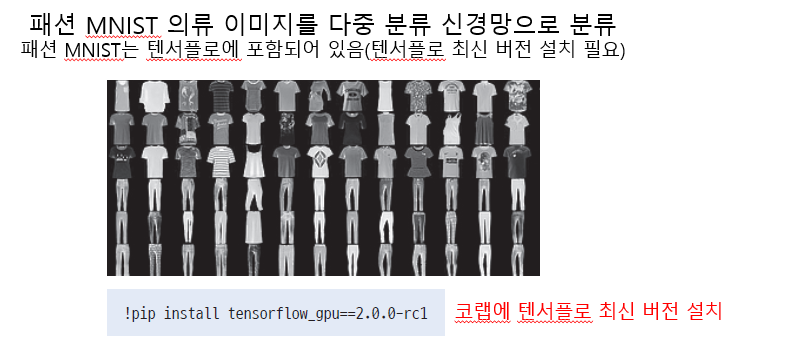

In [70]:
# 데이터 수집

X_train_np = np.loadtxt('./skyggle_Fashion_MNIST/X_train.txt')
y_train_np = np.loadtxt('./skyggle_Fashion_MNIST/y_train.txt').astype(int)
X_test_np = np.loadtxt('./skyggle_Fashion_MNIST/X_test.txt')

In [71]:
X_train_np.shape, y_train_np.shape, X_test_np.shape

((60000, 784), (60000,), (10000, 784))

In [72]:
sub = pd.read_csv('./skyggle_Fashion_MNIST/submission.csv')

#### 데이터 탐색

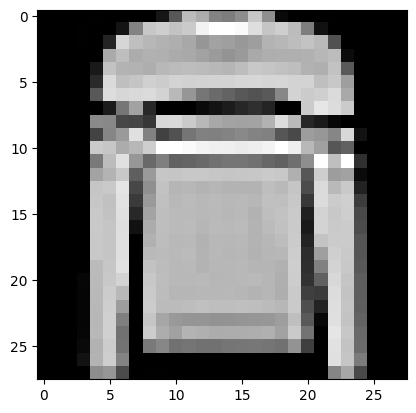

In [73]:
# 샘플 이미지 확인
# cmap의 기본값 'viridis' 짙은 녹색 ~ 밝은 노란색, cmap=gray, 0에 가까울수록 어둡다

import matplotlib.pyplot as plt
plt.imshow(X_train_np[5].reshape(28,28),cmap='gray')


In [74]:
# 클래스(타겟)의 내용과 의미 확인하기
y_train_np[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [75]:
class_names = [
                    "T-shirt/top",
                    "Trouser",
                    "Pullover",
                    "Dress",
                    "Coat",
                    "Sandal",
                    "Shirt",
                    "Sneaker",
                    "Bag",
                    "Ankle boot",
                ]
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [76]:
# 타겟 분포 확인하기 : numpy.bincount() - 배열에 있는 정수값의 빈도를 세고, 정수에 해당하는 인덱스 위치에 저장함
pd.Series(y_train_np).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

#### 데이터 준비 : 분할, 정규화, 차원 변경

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_np, y_train_np,
                                                  stratify = y_train_np,
                                                  test_size=0.2,
                                                  random_state=42)

In [78]:
X_train.shape, X_val.shape

((48000, 784), (12000, 784))

In [79]:
y_train.shape, y_val.shape

((48000,), (12000,))

In [80]:
# 데이터 정규화

X_train.max()

255.0

In [35]:
# 원핫 인코딩

from tensorflow.keras.utils import to_categorical

X_train = X_train / 255
X_val = X_val /255

y_train_encoded = to_categorical(y_train)

In [81]:
# 다중 분류 클래스인 y_train을 원핫 인코딩 하지 않고 그대로 사용하되 
# 최적화(compile)의 손실함수를 "sparse-categorical_crossentropy"를 사용함

X_train = X_train / 255
X_val = X_val /255


####  인공 신경망 모형 구성

In [210]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, input_shape=(784,),activation='relu',
                kernel_initializer='glorot_uniform'))
model.add(Dense(units=100,activation='softmax'))
model.add(Dense(units=100,activation='softmax'))

In [211]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               78500     
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
Total params: 98,700
Trainable params: 98,700
Non-trainable params: 0
_________________________________________________________________


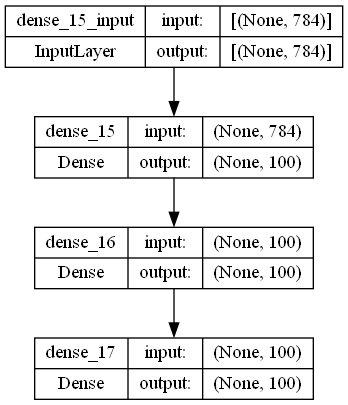

In [212]:
from keras.utils import plot_model

plot_model(model,show_shapes=True,show_layer_names=True,to_file="Fashion_MNIST.png")

#### 최적화 알고리즘과 손실함수 지정: 모형의 학습 과정 설정

In [213]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics = 'accuracy',
              optimizer = 'adam')

#### 모델 구조 이미지 출력 및 파일 저장

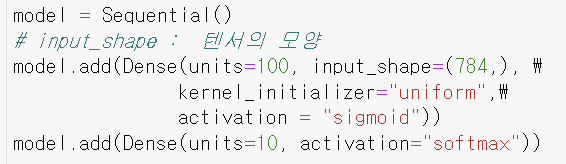

#### 모델 훈련

In [214]:
hist = model.fit(X_train,y_train,epochs=40,
                 validation_data=(X_val,y_val))

Epoch 1/40
1500/1500 [==============================] - 3s 2ms/step - loss: 2.7676 - accuracy: 0.2864 - val_loss: 1.8071 - val_accuracy: 0.2947
Epoch 2/40
1500/1500 [==============================] - 2s 2ms/step - loss: 1.5995 - accuracy: 0.2974 - val_loss: 1.4848 - val_accuracy: 0.3095
Epoch 3/40
1500/1500 [==============================] - 2s 2ms/step - loss: 1.4245 - accuracy: 0.3297 - val_loss: 1.3776 - val_accuracy: 0.3985
Epoch 4/40
1500/1500 [==============================] - 4s 3ms/step - loss: 1.3119 - accuracy: 0.4657 - val_loss: 1.2282 - val_accuracy: 0.5213
Epoch 5/40
1500/1500 [==============================] - 5s 3ms/step - loss: 1.0802 - accuracy: 0.6147 - val_loss: 0.9861 - val_accuracy: 0.6618
Epoch 6/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.9322 - accuracy: 0.6613 - val_loss: 0.9232 - val_accuracy: 0.6570
Epoch 7/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8655 - accuracy: 0.6851 - val_loss: 0.8534 - val_accuracy:

#### 손실과 정확도 그래프: 모델 성능 평가

In [215]:
df = pd.DataFrame(hist.history)

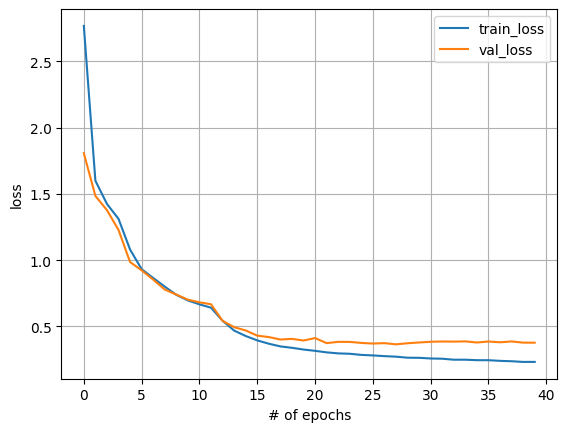

In [216]:
plt.plot(df.loss, label='train_loss')
plt.plot(df.val_loss,label='val_loss')
plt.xlabel('# of epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()


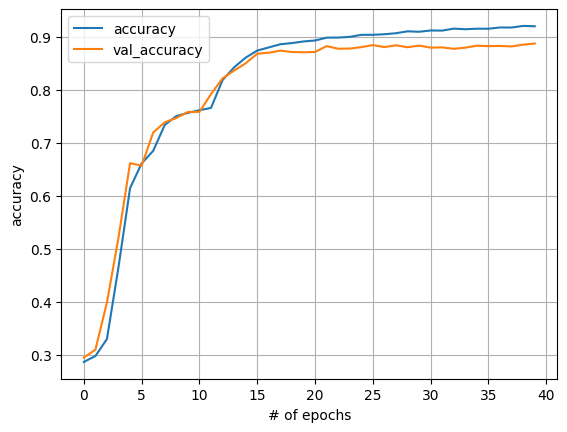

In [217]:
plt.plot(df.accuracy, label='accuracy')
plt.plot(df.val_accuracy,label='val_accuracy')
plt.xlabel('# of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()


In [ ]:
#######################################

In [125]:
np.set_printoptions(suppress=True)
y_pred_proba = model.predict(X_val)

375/375 [==============================] - 0s 835us/step


In [218]:
np.set_printoptions(suppress=True)
y_pred_proba = model.predict(X_test_np)

313/313 [==============================] - 0s 1ms/step


In [179]:
y_pred_proba[:10]

array([[0.00000016, 0.        , 0.00000045, ..., 0.        , 0.        ,
        0.        ],
       [0.00319915, 0.00004413, 0.979395  , ..., 0.        , 0.        ,
        0.        ],
       [0.0003383 , 0.9991308 , 0.00005748, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00000197, 0.01442691, ..., 0.        , 0.        ,
        0.        ],
       [0.00005989, 0.00000376, 0.00000314, ..., 0.        , 0.        ,
        0.        ],
       [0.00000679, 0.        , 0.00000677, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [203]:
y_pred_class = np.argmax(y_pred_proba,axis=1)

In [208]:
print(y_pred_class[:10])
print(y_val[:10])

[9 2 1 1 0 1 4 6 5 7]
[5 4 5 2 1 5 0 1 2 0]


In [209]:
sub.label=np.argmax(y_pred_proba, axis=-1)
sub.to_csv('pred.csv' ,index=None)